In [1]:
from google.colab import files
files.upload()


Saving loaddata .csv to loaddata  (1).csv


{'loaddata .csv': b'Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status\r\nLP001002,Male,No,0,Graduate,No,5849,0,,360,1,Urban,Y\r\nLP001003,Male,Yes,1,Graduate,No,4583,1508,128,360,1,Rural,N\r\nLP001005,Male,Yes,0,Graduate,Yes,3000,0,66,360,1,Urban,Y\r\nLP001006,Male,Yes,0,Not Graduate,No,2583,2358,120,360,1,Urban,Y\r\nLP001008,Male,No,0,Graduate,No,6000,0,141,360,1,Urban,Y\r\nLP001011,Male,Yes,2,Graduate,Yes,5417,4196,267,360,1,Urban,Y\r\nLP001013,Male,Yes,0,Not Graduate,No,2333,1516,95,360,1,Urban,Y\r\nLP001014,Male,Yes,3+,Graduate,No,3036,2504,158,360,0,Semiurban,N\r\nLP001018,Male,Yes,2,Graduate,No,4006,1526,168,360,1,Urban,Y\r\nLP001020,Male,Yes,1,Graduate,No,12841,10968,349,360,1,Semiurban,N\r\nLP001024,Male,Yes,2,Graduate,No,3200,700,70,360,1,Urban,Y\r\nLP001027,Male,Yes,2,Graduate,,2500,1840,109,360,1,Urban,Y\r\nLP001028,Male,Yes,2,Graduate,No,3073,8106,200,360,1,Urban,Y

In [2]:
!ls

'loaddata  (1).csv'  'loaddata .csv'   sample_data


In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [4]:
df=pd.read_csv('loaddata .csv',encoding='latin')
df.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
df.shape

(614, 13)

In [6]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [7]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [8]:
# summary of the dataset given to us

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


In [9]:
'''there are three datatypes in the dataset mainly object i.e npn numerical , integer and floating point'''

'''let us start the univariate analysis'''

df['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

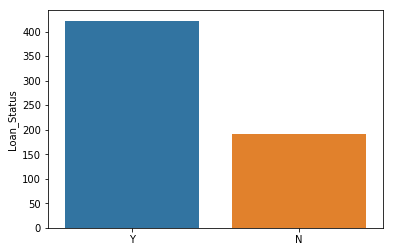

In [10]:
''' here we see that there is two types of values either yes or no ... so later can be converted into boolean 0 and 1'''

''' now let us bar plot the data'''

sns.barplot(y=df['Loan_Status'].value_counts(),x=['Y','N'])

In [11]:
''' here we see that for yes there is >400 values and and for no there are <200 values which makes the ratio 2:1'''
df['Loan_Status'].value_counts(normalize=True)*100
'''this gives the percentage of data for yes and no'''

'this gives the percentage of data for yes and no'

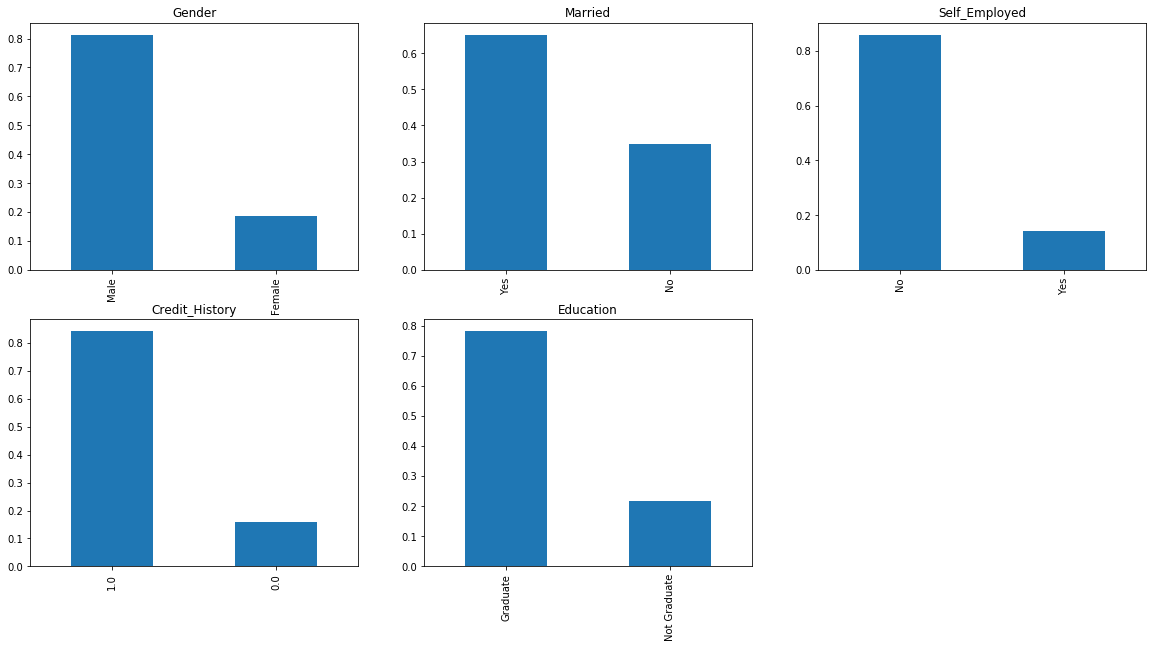

'the following figure shows the distribution of the categorical values'

In [12]:
''' now there are 5 categorical feature '''
plt.subplot(231)
df['Gender'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= 'Gender')

plt.subplot(232)
df['Married'].value_counts(normalize=True).plot.bar(title= 'Married')

plt.subplot(233)
df['Self_Employed'].value_counts(normalize=True).plot.bar(title= 'Self_Employed')

plt.subplot(234)
df['Credit_History'].value_counts(normalize=True).plot.bar(title= 'Credit_History')

plt.subplot(235)
df['Education'].value_counts(normalize=True).plot.bar(title= 'Education')

plt.show()

'''the following figure shows the distribution of the categorical values'''

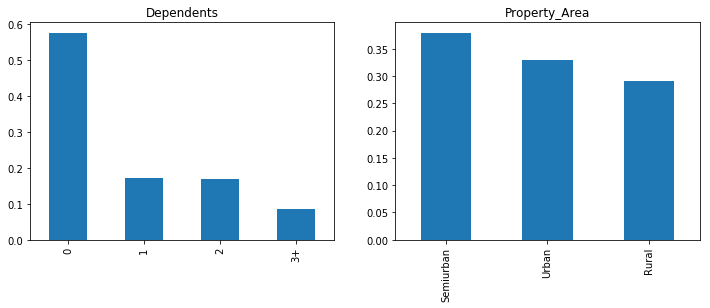

In [13]:
'''time to visualize and analyze the remaining categorical field'''

plt.subplot(121)
df['Dependents'].value_counts(normalize=True).plot.bar(figsize=(12,4), title= 'Dependents')

plt.subplot(122)
df['Property_Area'].value_counts(normalize=True).plot.bar(title= 'Property_Area')

plt.show()

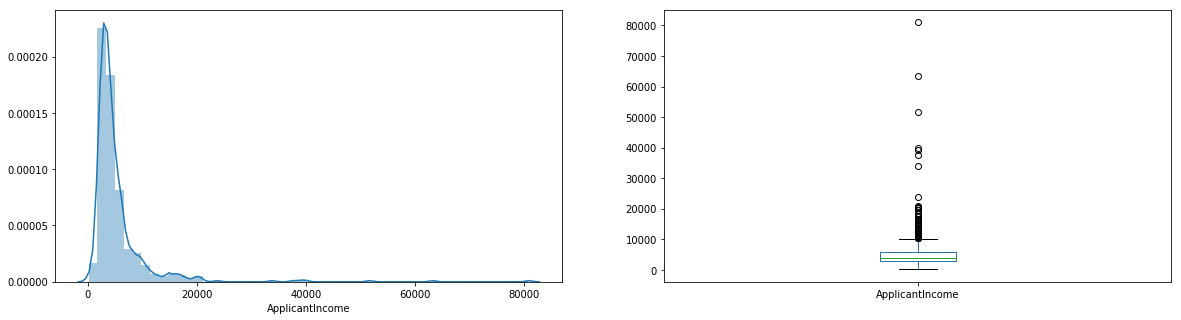

' the box plot shows clear notation of outliers ... ummm lets see what is the cause ... may be bank doesnot give loans \nto illeterate ... graduation nhi kia to credit card nhi milega'

In [14]:
'''now lets the distribution of the continuoud data
we will visualize the applicant income distribution and box plots'''

plt.subplot(121)
sns.distplot(df['ApplicantIncome']);

plt.subplot(122)
df['ApplicantIncome'].plot.box(figsize=(20,5))

plt.show()

'''OMFG all the distribution on the left ... Jeez it is not fucking normal ... 
alas we have to make it normal for all other things to get clear ... lets see'''

''' the box plot shows clear notation of outliers ... ummm lets see what is the cause ... may be bank doesnot give loans 
to illeterate ... graduation nhi kia to credit card nhi milega'''

' see we found out the fucking cause behind the abnormal distribution of the applicant income xD.... its education \n... there are more applicant income in the graduated category '

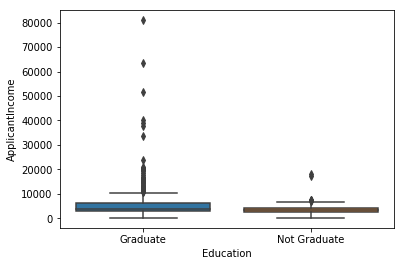

In [15]:
sns.boxplot(x=df['Education'],y=df['ApplicantIncome'],data=df)

''' see we found out the fucking cause behind the abnormal distribution of the applicant income xD.... its education 
... there are more applicant income in the graduated category '''

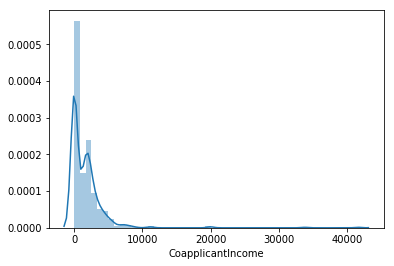

In [16]:
'''lets see the co applicant income'''

sns.distplot(df['CoapplicantIncome'])


'again left side shift ... may be because of eduaction again ... l.ets see'

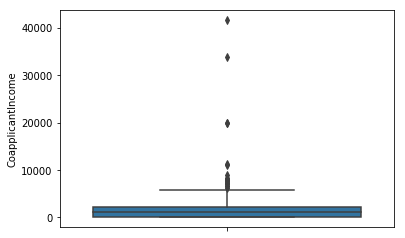

In [17]:
sns.boxplot(y=df['CoapplicantIncome'],data=df)

'''again left side shift ... may be because of eduaction again ... l.ets see'''

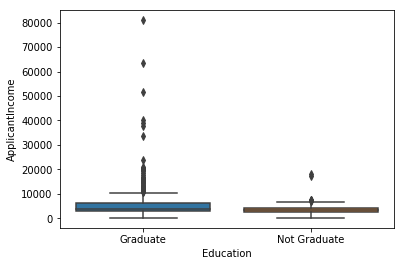

In [18]:
sns.boxplot(x=df['Education'],y=df['ApplicantIncome'],data=df)

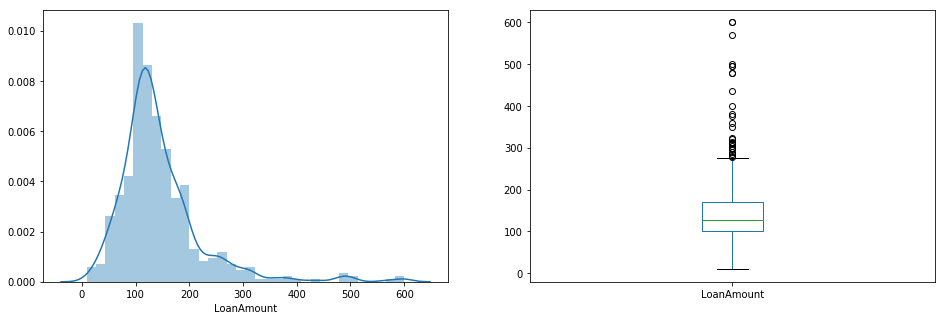

'Fairly normal .. we can say'

In [19]:
plt.subplot(121)
tdf=df.dropna()
sns.distplot(tdf['LoanAmount']);

plt.subplot(122)
tdf['LoanAmount'].plot.box(figsize=(16,5))

plt.show()

'''Fairly normal .. we can say'''

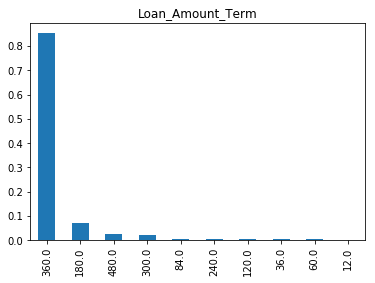

In [20]:
df['Loan_Amount_Term'].value_counts(normalize=True).plot.bar(title= 'Loan_Amount_Term')

Loan_Status    N    Y
Gender               
Female        37   75
Male         150  339


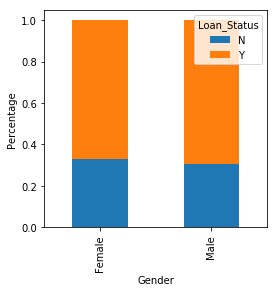

In [21]:
# bivariate analysis

print(pd.crosstab(df['Gender'],df['Loan_Status']))

Gender = pd.crosstab(df['Gender'],df['Loan_Status'])
Gender.div(Gender.sum(1).astype(float), axis = 0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.xlabel('Gender')
p = plt.ylabel('Percentage')

Loan_Status    N    Y
Married              
No            79  134
Yes          113  285


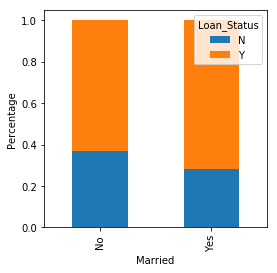

In [22]:
print(pd.crosstab(df['Married'],df['Loan_Status']))

Married = pd.crosstab(df['Married'],df['Loan_Status'])
Married.div(Married.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.xlabel('Married')
p = plt.ylabel('Percentage')

Loan_Status    N    Y
Dependents           
0            107  238
1             36   66
2             25   76
3+            18   33


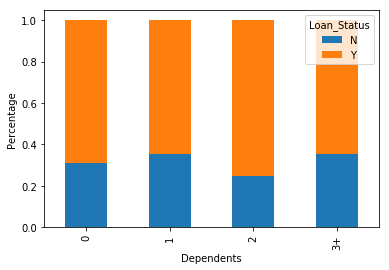

In [23]:
print(pd.crosstab(df['Dependents'],df['Loan_Status']))

Dependents=pd.crosstab(df['Dependents'],df['Loan_Status'])
Dependents.div(Dependents.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('Dependents')
p = plt.ylabel('Percentage')

Loan_Status     N    Y
Education             
Graduate      140  340
Not Graduate   52   82


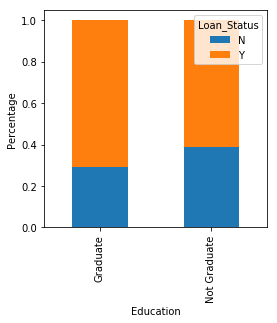

In [24]:
print(pd.crosstab(df['Education'],df['Loan_Status']))

Education=pd.crosstab(df['Education'],df['Loan_Status'])
Education.div(Education.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.xlabel('Education')
p = plt.ylabel('Percentage')

Loan_Status      N    Y
Self_Employed          
No             157  343
Yes             26   56


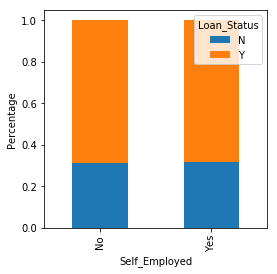

In [25]:
print(pd.crosstab(df['Self_Employed'],df['Loan_Status']))

Self_Employed=pd.crosstab(df['Self_Employed'],df['Loan_Status'])
Self_Employed.div(Self_Employed.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.xlabel('Self_Employed')
p = plt.ylabel('Percentage')

Loan_Status      N    Y
Credit_History         
0.0             82    7
1.0             97  378


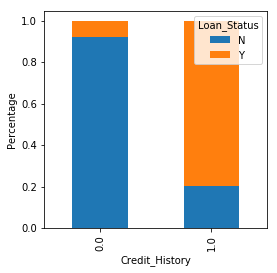

In [26]:
print(pd.crosstab(df['Credit_History'],df['Loan_Status']))

Credit_History=pd.crosstab(df['Credit_History'],df['Loan_Status'])
Credit_History.div(Credit_History.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.xlabel('Credit_History')
p = plt.ylabel('Percentage')

Loan_Status     N    Y
Property_Area         
Rural          69  110
Semiurban      54  179
Urban          69  133


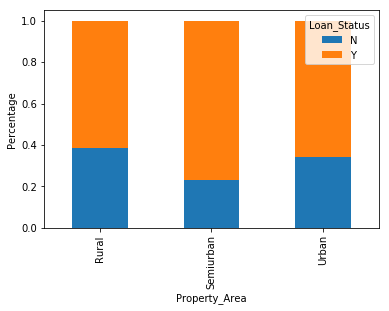

In [27]:
print(pd.crosstab(df['Property_Area'],df['Loan_Status']))

Property_Area=pd.crosstab(df['Property_Area'],df['Loan_Status'])
Property_Area.div(Property_Area.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('Property_Area')
P = plt.ylabel('Percentage')

Loan_Status
N    5446.078125
Y    5384.068720
Name: ApplicantIncome, dtype: float64


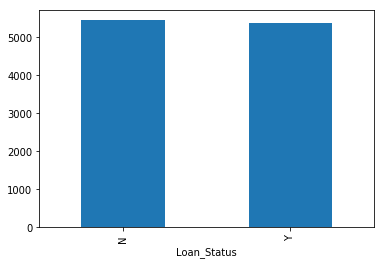

In [28]:
print(df.groupby('Loan_Status')['ApplicantIncome'].mean())

df.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()

In [29]:
'''now we will try to test our hypo thesis that loan app ststus depends upon applicant income
let us create bins for applicant income'''

bins = [0,2500,4000,6000,81000]
group = ['Low','Average','High', 'Very high']
df['Income_bin'] = pd.cut(tdf['ApplicantIncome'],bins,labels=group)

df[['ApplicantIncome','Income_bin','Loan_Status']].head(20)

,ApplicantIncome,Income_bin,Loan_Status
0,5849,NaN,Y
1,4583,High,N
2,3000,Average,Y
3,2583,Average,Y
4,6000,High,Y
5,5417,High,Y
6,2333,Low,Y
7,3036,Average,N
8,4006,High,Y
9,12841,Very high,N


Loan_Status   N    Y
Income_bin          
Low          26   57
Average      51  123
High         32   79
Very high    39   73


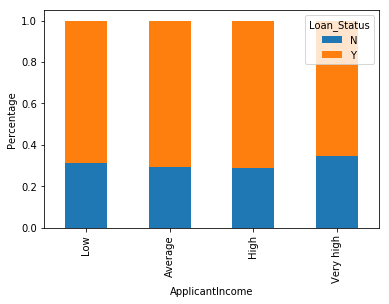

In [30]:
print(pd.crosstab(df['Income_bin'],df['Loan_Status']))

Income_bin = pd.crosstab(df['Income_bin'],df['Loan_Status'])
Income_bin.div(Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('ApplicantIncome')
P = plt.ylabel('Percentage')

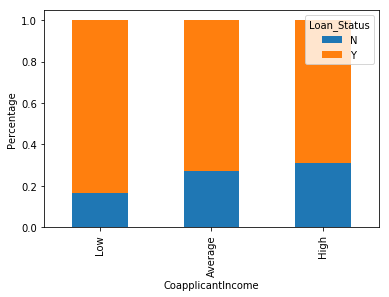

In [31]:
'''we see that applicant income doesnot implies loan status'''
'''lets try for coapplicant income'''
bins = [0,1000,3000,42000]
group = ['Low','Average','High']
df['Coapplicant_Income_bin'] = pd.cut(tdf['CoapplicantIncome'],bins,labels=group)
Coapplicant_Income_bin = pd.crosstab(df['Coapplicant_Income_bin'],df['Loan_Status'])
Coapplicant_Income_bin.div(Coapplicant_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('CoapplicantIncome')
P = plt.ylabel('Percentage')

In [32]:
'''ummm co applicant income is low then chances of getting loan is preety high ... isnt that fishy'''
'''may be some one donot have co applicant'''

df['CoapplicantIncome'].isna().sum()

0

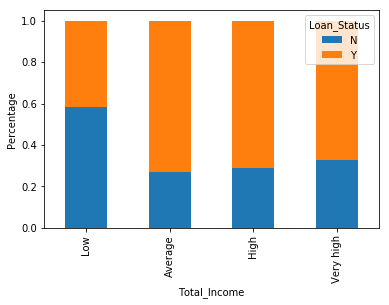

In [33]:
df['Total_Income'] = df['ApplicantIncome'] + df['CoapplicantIncome']
bins = [0,2500,4000,6000,81000]
group = ['Low','Average','High', 'Very high']
df['Total_Income_bin'] = pd.cut(df['Total_Income'],bins,labels=group)
Total_Income_bin = pd.crosstab(df['Total_Income_bin'],df['Loan_Status'])
Total_Income_bin.div(Total_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('Total_Income')
P = plt.ylabel('Percentage')

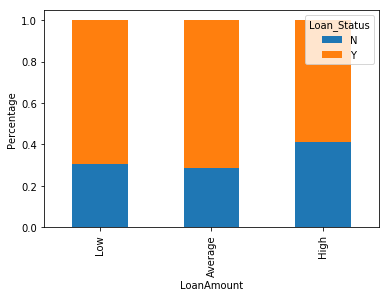

In [34]:
'''let us visualize the loan amount variable'''
bins = [0,100,200,700]
group = ['Low','Average','High']
df['LoanAmount_bin'] = pd.cut(tdf['LoanAmount'],bins,labels=group)
LoanAmount_bin = pd.crosstab(df['LoanAmount_bin'],df['Loan_Status'])
LoanAmount_bin.div(LoanAmount_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('LoanAmount')
P = plt.ylabel('Percentage')

In [0]:
df = df.drop(['Income_bin', 'Coapplicant_Income_bin', 'LoanAmount_bin', 'Total_Income_bin', 'Total_Income'], axis=1)

In [0]:
df['Dependents'].replace('3+', 4, inplace=True)


In [0]:
df['Loan_Status'].replace('N', 0, inplace=True)
df['Loan_Status'].replace('Y', 1, inplace=True)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
ApplicantIncome,1.000000,-0.116605,0.570909,-0.045306,-0.014715,-0.004710
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059878,-0.002056,-0.059187
LoanAmount,0.570909,0.188619,1.000000,0.039447,-0.008433,-0.037318
Loan_Amount_Term,-0.045306,-0.059878,0.039447,1.000000,0.001470,-0.021268
Credit_History,-0.014715,-0.002056,-0.008433,0.001470,1.000000,0.561678
Loan_Status,-0.004710,-0.059187,-0.037318,-0.021268,0.561678,1.000000


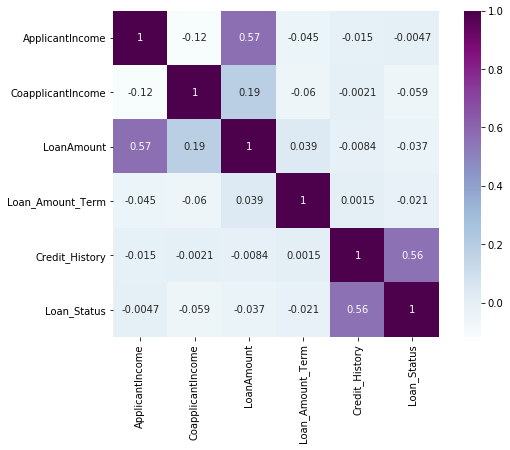

In [38]:
matrix = df.corr()
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(matrix, vmax=1, square=True, cmap="BuPu", annot=True)

matrix

In [39]:
'''
We see that the most correlated variables are

(ApplicantIncome - LoanAmount) with correlation coefficient of 0.57
(Credit_History - Loan_Status) with correlation coefficient of 0.56
LoanAmount is also correlated with CoapplicantIncome with correlation coefficient of 0.19.'''

'\nWe see that the most correlated variables are\n\n(ApplicantIncome - LoanAmount) with correlation coefficient of 0.57\n(Credit_History - Loan_Status) with correlation coefficient of 0.56\nLoanAmount is also correlated with CoapplicantIncome with correlation coefficient of 0.19.'

In [40]:
'''lets remove missing value now'''

df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [0]:
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['Married'].fillna(df['Married'].mode()[0], inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)

In [42]:
df.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [43]:
df['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [44]:
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace=True)
df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace=True)
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

Text(0.5, 1.0, 'Dataset')

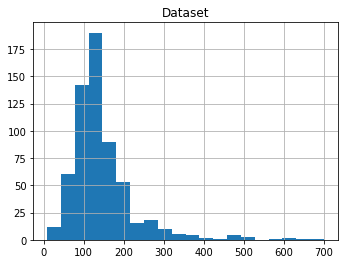

In [45]:
ax1 = plt.subplot(121)
df['LoanAmount'].hist(bins=20, figsize=(12,4))
ax1.set_title("Dataset")

Text(0.5, 1.0, 'Dataframe')

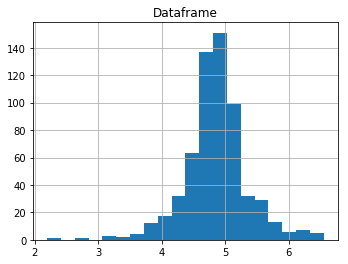

In [46]:
# Removing skewness in LoanAmount variable by log transformation
df['LoanAmount_log'] = np.log(df['LoanAmount'])
ax1 = plt.subplot(121)
df['LoanAmount_log'].hist(bins=20, figsize=(12,4))
ax1.set_title("Dataframe")


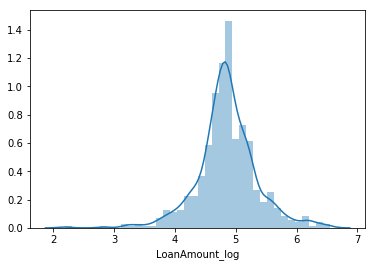

In [47]:
sns.distplot(df['LoanAmount_log'])

In [0]:
'''lets start model building '''

df = df.drop('Loan_ID', axis=1)


In [0]:
X = df.drop('Loan_Status', 1)
y =df.Loan_Status

In [50]:
X = pd.get_dummies(X)
df= pd.get_dummies(df)
X.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,LoanAmount_log,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_4,Dependents_0,Dependents_1,Dependents_2,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,128.0,360.0,1.0,4.852030,0,1,1,0,0,1,0,0,1,0,1,0,0,0,1
1,4583,1508.0,128.0,360.0,1.0,4.852030,0,1,0,1,0,0,1,0,1,0,1,0,1,0,0
2,3000,0.0,66.0,360.0,1.0,4.189655,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1
3,2583,2358.0,120.0,360.0,1.0,4.787492,0,1,0,1,0,1,0,0,0,1,1,0,0,0,1
4,6000,0.0,141.0,360.0,1.0,4.948760,0,1,1,0,0,1,0,0,1,0,1,0,0,0,1


In [0]:
from sklearn.model_selection import train_test_split
x_train, x_cv, y_train, y_cv = train_test_split(X, y, test_size=0.3, random_state=0)


In [52]:
x_train.shape, x_cv.shape, y_train.shape, y_cv.shape

((429, 21), (185, 21), (429,), (185,))

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [54]:
model = LogisticRegression()
model.fit(x_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [55]:
pred_cv = model.predict(x_cv)
accuracy_score(y_cv, pred_cv)

0.8324324324324325

[[ 22  29]
 [  2 132]]


Text(33.0, 0.5, 'True')

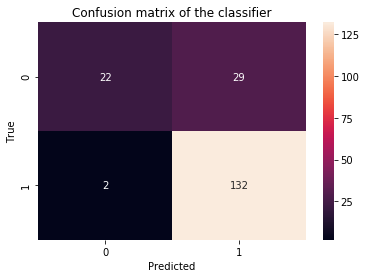

In [56]:
from sklearn.metrics import confusion_matrix
 
cm = confusion_matrix(y_cv, pred_cv)
print(cm)


sns.heatmap(cm, annot=True, fmt="d")
plt.title('Confusion matrix of the classifier')
plt.xlabel('Predicted')
plt.ylabel('True')

In [57]:
from sklearn.metrics import classification_report
print(classification_report(y_cv, pred_cv))

              precision    recall  f1-score   support

           0       0.92      0.43      0.59        51
           1       0.82      0.99      0.89       134

    accuracy                           0.83       185
   macro avg       0.87      0.71      0.74       185
weighted avg       0.85      0.83      0.81       185



In [58]:
'''logistic regression with k fold cross'''

from sklearn.model_selection import StratifiedKFold
mean_accuracy = []
i = 1
kf = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)

for train_index, test_index in kf.split(X, y):
    print('\n{} of kfold {}'.format(i, kf.n_splits))
    xtr, xvl = X.loc[train_index], X.loc[test_index]
    ytr, yvl = y[train_index], y[test_index]
    
    model = LogisticRegression(random_state=1)
    model.fit(xtr, ytr)
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl, pred_test)
    mean_accuracy.append(score)
    print('accuracy_score', score)
    i+=1
    
print("\nMean validation accuracy: ", sum(mean_accuracy)/len(mean_accuracy))

pred_test = model.predict(x_cv)


# calculate probability estimates of loan approval
# column 0 is the probability for class 0 and column 1 is the probability for class 1
# probability of loan default = 1 - model.predict_proba(test)[:,1]
pred = model.predict_proba(xvl)[:,1]




1 of kfold 5
accuracy_score 0.8064516129032258

2 of kfold 5
accuracy_score 0.8064516129032258

3 of kfold 5
accuracy_score 0.8114754098360656

4 of kfold 5
accuracy_score 0.7868852459016393

5 of kfold 5
accuracy_score 0.8360655737704918

Mean validation accuracy:  0.8094658910629298


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

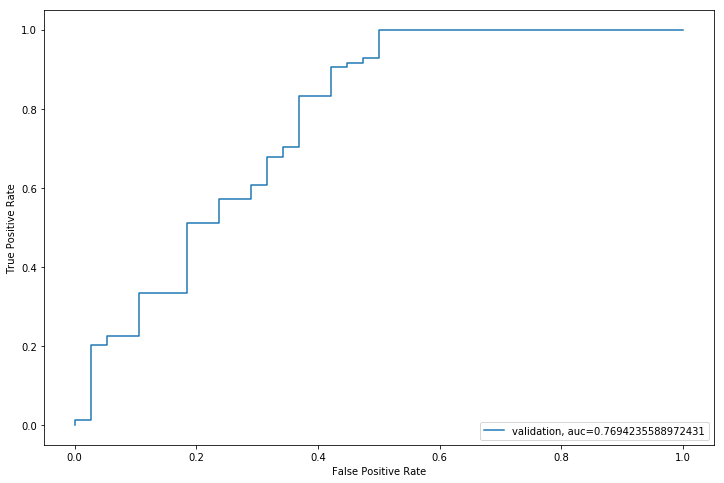

In [59]:
'''ROC curve'''
from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(yvl,  pred)
auc = metrics.roc_auc_score(yvl, pred)
plt.figure(figsize=(12,8))
plt.plot(fpr,tpr,label="validation, auc="+str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

In [0]:
'''let us increase the recall by feature engineering'''

df['Total_Income'] = df['ApplicantIncome'] + df['CoapplicantIncome']


Text(0.5, 1.0, 'Train')

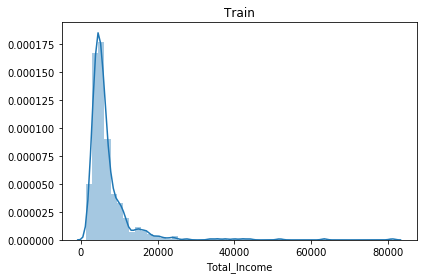

In [61]:
fig = plt.figure(figsize=(14, 4))
ax1 = plt.subplot(121)
sns.distplot(df['Total_Income'])
 
ax1.set_title("Train")

In [0]:
df['Total_Income_log'] = np.log(df['Total_Income'])

Text(0.5, 1.0, 'Train')

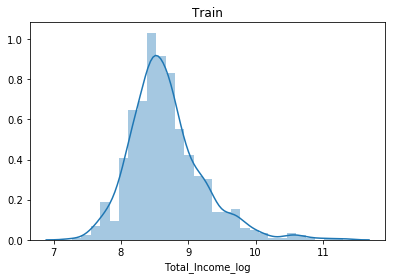

In [63]:
fig = plt.figure(figsize=(14, 4))
ax1 = plt.subplot(121)
sns.distplot(df['Total_Income_log'])
 
ax1.set_title("Train")

In [0]:
df['EMI'] = df['LoanAmount'] / df['Loan_Amount_Term']

Text(0.5, 1.0, 'dataset')

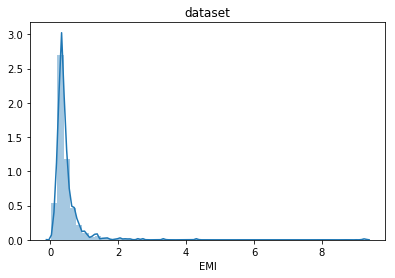

In [65]:
fig = plt.figure(figsize=(14, 4))
ax1 = plt.subplot(121)
sns.distplot(df['EMI'])
ax1.set_title("dataset")

In [0]:
df['EMI_log'] = np.log(df['EMI'])


Text(0.5, 1.0, 'dataset')

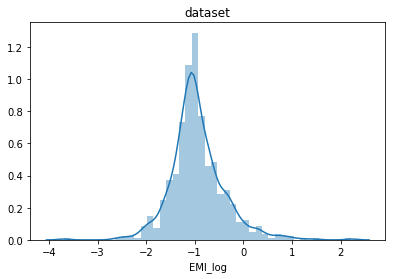

In [67]:
fig = plt.figure(figsize=(14, 4))
ax1 = plt.subplot(121)
sns.distplot(df['EMI_log'])
ax1.set_title("dataset")

In [0]:
df=df.drop(['BI_log'],axis=1)

In [0]:
df['Balance Income'] = df['Total_Income'] - (df['EMI']*1000)

In [73]:
df = df.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term','EMI'], axis=1)

KeyError: ignored

In [74]:
df.head()

,Credit_History,Loan_Status,LoanAmount_log,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_4,Dependents_0,Dependents_1,Dependents_2,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Total_Income,Total_Income_log,EMI_log,Balance Income
0,1.0,1,4.852030,0,1,1,0,0,1,0,0,1,0,1,0,0,0,1,5849.0,8.674026,-1.034074,5493.444444
1,1.0,0,4.852030,0,1,0,1,0,0,1,0,1,0,1,0,1,0,0,6091.0,8.714568,-1.034074,5735.444444
2,1.0,1,4.189655,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1,3000.0,8.006368,-1.696449,2816.666667
3,1.0,1,4.787492,0,1,0,1,0,1,0,0,0,1,1,0,0,0,1,4941.0,8.505323,-1.098612,4607.666667
4,1.0,1,4.948760,0,1,1,0,0,1,0,0,1,0,1,0,0,0,1,6000.0,8.699515,-0.937344,5608.333333


In [0]:
#df['EMI_log']=np.log(df['EMI_log'])
#df.head()

In [75]:
df.isna().sum()

Credit_History             0
Loan_Status                0
LoanAmount_log             0
Gender_Female              0
Gender_Male                0
Married_No                 0
Married_Yes                0
Dependents_4               0
Dependents_0               0
Dependents_1               0
Dependents_2               0
Education_Graduate         0
Education_Not Graduate     0
Self_Employed_No           0
Self_Employed_Yes          0
Property_Area_Rural        0
Property_Area_Semiurban    0
Property_Area_Urban        0
Total_Income               0
Total_Income_log           0
EMI_log                    0
Balance Income             0
dtype: int64

In [0]:
X=df.drop('Loan_Status', axis=1)
y = df.Loan_Status 

In [119]:
mean_accuracy = []
i = 1
kf = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)

for train_index, test_index in kf.split(X, y):
    print('\n{} of kfold {}'.format(i, kf.n_splits))
    xtr, xvl = X.loc[train_index], X.loc[test_index]
    ytr, yvl = y[train_index], y[test_index]
    
    model = LogisticRegression(random_state=1)
    model.fit(xtr, ytr)
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl, pred_test)
    mean_accuracy.append(score)
    print('accuracy_score', score)
    i+=1
    
print("\nMean validation accuracy: ", sum(mean_accuracy)/len(mean_accuracy))


1 of kfold 5
accuracy_score 0.8064516129032258

2 of kfold 5
accuracy_score 0.8064516129032258

3 of kfold 5
accuracy_score 0.8032786885245902

4 of kfold 5
accuracy_score 0.7950819672131147

5 of kfold 5
accuracy_score 0.8360655737704918

Mean validation accuracy:  0.8094658910629298


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

In [120]:
'''decision tree'''

from sklearn import tree
mean_accuracy = []
i=1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    xtr,xvl = X.loc[train_index],X.loc[test_index]
    ytr,yvl = y[train_index],y[test_index]
    
    model = tree.DecisionTreeClassifier(random_state=1)
    model.fit(xtr, ytr)
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl,pred_test)
    mean_accuracy.append(score)
    print('accuracy_score',score)
    i+=1
    
print("\nMean validation accuracy: ", sum(mean_accuracy)/len(mean_accuracy))


1 of kfold 5
accuracy_score 0.75

2 of kfold 5
accuracy_score 0.75

3 of kfold 5
accuracy_score 0.6721311475409836

4 of kfold 5
accuracy_score 0.6967213114754098

5 of kfold 5
accuracy_score 0.7049180327868853

Mean validation accuracy:  0.7147540983606557


In [121]:
'''random forest'''
from sklearn.ensemble import RandomForestClassifier
mean_accuracy = []
i=1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X, y):
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    xtr,xvl = X.loc[train_index],X.loc[test_index]
    ytr,yvl = y[train_index],y[test_index]
    
    model = RandomForestClassifier(random_state=1, max_depth=10, n_estimators=10)
    model.fit(xtr, ytr)
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl,pred_test)
    mean_accuracy.append(score)
    print('accuracy_score',score)
    i+=1
    
print("\nMean validation accuracy: ", sum(mean_accuracy)/len(mean_accuracy))


1 of kfold 5
accuracy_score 0.7338709677419355

2 of kfold 5
accuracy_score 0.7903225806451613

3 of kfold 5
accuracy_score 0.7868852459016393

4 of kfold 5
accuracy_score 0.7704918032786885

5 of kfold 5
accuracy_score 0.8524590163934426

Mean validation accuracy:  0.7868059227921735


In [0]:
'''hyperparameter tuning and grid search cv'''
from sklearn.model_selection import GridSearchCV
paramgrid = {'max_depth': list(range(1, 20, 2)), 'n_estimators': list(range(1, 200, 20))}
paramgrid = {'max_depth': list(range(1, 20, 2)), 'n_estimators': list(range(1, 200, 20))}

In [0]:
from sklearn.model_selection import train_test_split
x_train, x_cv, y_train, y_cv = train_test_split(X, y, test_size =0.3, random_state=1)

In [0]:
grid_search = GridSearchCV(RandomForestClassifier(random_state=1), paramgrid)

In [125]:
grid_search.fit(x_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False, random_state=1,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_gri

In [126]:
grid_search.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=3, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=141,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [127]:
mean_accuracy = []
i=1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    xtr,xvl = X.loc[train_index],X.loc[test_index]
    ytr,yvl = y[train_index],y[test_index]
    
    model = RandomForestClassifier(random_state=1, max_depth=3, n_estimators=141)
    model.fit(xtr, ytr)
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl,pred_test)
    mean_accuracy.append(score)
    print('accuracy_score',score)
    i+=1
    
print("\nMean validation accuracy: ", sum(mean_accuracy)/len(mean_accuracy))


1 of kfold 5
accuracy_score 0.8145161290322581

2 of kfold 5
accuracy_score 0.7983870967741935

3 of kfold 5
accuracy_score 0.7950819672131147

4 of kfold 5
accuracy_score 0.7950819672131147

5 of kfold 5
accuracy_score 0.8442622950819673

Mean validation accuracy:  0.8094658910629295


In [128]:
'XGBoost'
from xgboost import XGBClassifier
mean_accuracy = []
i=1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    xtr,xvl = X.loc[train_index],X.loc[test_index]
    ytr,yvl = y[train_index],y[test_index]
    
    model = XGBClassifier(random_state=1, n_estimators=50, max_depth=4)
    model.fit(xtr, ytr)
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl,pred_test)
    mean_accuracy.append(score)
    print('accuracy_score',score)
    i+=1
    
print("\nMean validation accuracy: ", sum(mean_accuracy)/len(mean_accuracy))


1 of kfold 5
accuracy_score 0.7741935483870968

2 of kfold 5
accuracy_score 0.8064516129032258

3 of kfold 5
accuracy_score 0.7868852459016393

4 of kfold 5
accuracy_score 0.7868852459016393

5 of kfold 5
accuracy_score 0.819672131147541

Mean validation accuracy:  0.7948175568482284


In [0]:
paramgrid = {'max_depth': list(range(1, 20, 2)), 'n_estimators': list(range(1, 200, 20))}

In [0]:
grid_search = GridSearchCV(XGBClassifier(random_state=1), paramgrid)

In [0]:
x_train, x_cv, y_train, y_cv = train_test_split(X, y, test_size =0.3, random_state=1)

In [134]:
grid_search.fit(x_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False, random_state=1,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_gri

In [92]:
grid_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=1,
              min_child_weight=1, missing=None, n_estimators=81, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [159]:
mean_accuracy = []
i=1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    xtr,xvl = X.loc[train_index],X.loc[test_index]
    ytr,yvl = y[train_index],y[test_index]
    
    model = XGBClassifier(random_state=1, n_estimators=81, max_depth=1)
    model.fit(xtr, ytr)
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl,pred_test)
    mean_accuracy.append(score)
    print('accuracy_score',score)
    print(classification_report(yvl,pred_test))
    i+=1
    
print("\nMean validation accuracy: ", sum(mean_accuracy)/len(mean_accuracy))


1 of kfold 5
accuracy_score 0.8145161290322581
              precision    recall  f1-score   support

           0       0.94      0.44      0.60        39
           1       0.79      0.99      0.88        85

    accuracy                           0.81       124
   macro avg       0.87      0.71      0.74       124
weighted avg       0.84      0.81      0.79       124


2 of kfold 5
accuracy_score 0.7983870967741935
              precision    recall  f1-score   support

           0       0.79      0.49      0.60        39
           1       0.80      0.94      0.86        85

    accuracy                           0.80       124
   macro avg       0.80      0.71      0.73       124
weighted avg       0.80      0.80      0.78       124


3 of kfold 5
accuracy_score 0.7950819672131147
              precision    recall  f1-score   support

           0       0.88      0.39      0.55        38
           1       0.78      0.98      0.87        84

    accuracy                          

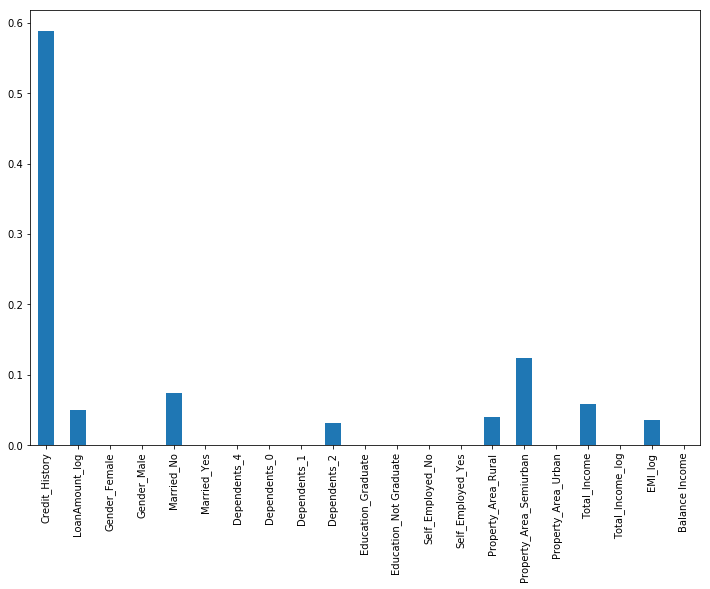

In [94]:
'''Feature Importance'''

importances = pd.Series(model.feature_importances_, index=X.columns)
importances.plot(kind='bar', figsize=(12,8))

In [133]:
'KNN'
from sklearn.neighbors import KNeighborsClassifier as kn
mean_accuracy = []
i=1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    xtr,xvl = X.loc[train_index],X.loc[test_index]
    ytr,yvl = y[train_index],y[test_index]
    
    model = kn(n_neighbors=3)
    model.fit(xtr, ytr)
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl,pred_test)
    mean_accuracy.append(score)
    print('accuracy_score',score)
    i+=1
    
print("\nMean validation accuracy: ", sum(mean_accuracy)/len(mean_accuracy))


1 of kfold 5
accuracy_score 0.5725806451612904

2 of kfold 5
accuracy_score 0.5887096774193549

3 of kfold 5
accuracy_score 0.6147540983606558

4 of kfold 5
accuracy_score 0.6147540983606558

5 of kfold 5
accuracy_score 0.6885245901639344

Mean validation accuracy:  0.6158646218931783


In [153]:
paramgrid = {'n_neighbors':list(range(1,50))}
grid_search = GridSearchCV(kn(), paramgrid)
x_train, x_cv, y_train, y_cv = train_test_split(X, y, test_size =0.3, random_state=1)
grid_search.fit(x_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30, ...]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [146]:
grid_search.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=21, p=2,
                     weights='uniform')

In [154]:
from sklearn.neighbors import KNeighborsClassifier as kn
mean_accuracy = []
i=1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    xtr,xvl = X.loc[train_index],X.loc[test_index]
    ytr,yvl = y[train_index],y[test_index]
    
    model = kn(n_neighbors=5)
    model.fit(xtr, ytr)
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl,pred_test)
    mean_accuracy.append(score)
    print('accuracy_score',score)
    i+=1
    
print("\nMean validation accuracy: ", sum(mean_accuracy)/len(mean_accuracy))


1 of kfold 5
accuracy_score 0.5967741935483871

2 of kfold 5
accuracy_score 0.6290322580645161

3 of kfold 5
accuracy_score 0.6557377049180327

4 of kfold 5
accuracy_score 0.6311475409836066

5 of kfold 5
accuracy_score 0.7131147540983607

Mean validation accuracy:  0.6451612903225807


In [158]:
'''adaboost'''
from sklearn.ensemble import AdaBoostClassifier as ada
mean_accuracy = []
i=1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    xtr,xvl = X.loc[train_index],X.loc[test_index]
    ytr,yvl = y[train_index],y[test_index]
    
    model = ada(random_state=1,algorithm='SAMME')
    model.fit(xtr, ytr)
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl,pred_test)
    mean_accuracy.append(score)
    print('accuracy_score',score)
    print(classification_report(yvl,pred_test))
    i+=1
    
print("\nMean validation accuracy: ", sum(mean_accuracy)/len(mean_accuracy))


1 of kfold 5
accuracy_score 0.8064516129032258
              precision    recall  f1-score   support

           0       0.89      0.44      0.59        39
           1       0.79      0.98      0.87        85

    accuracy                           0.81       124
   macro avg       0.84      0.71      0.73       124
weighted avg       0.82      0.81      0.78       124


2 of kfold 5
accuracy_score 0.7983870967741935
              precision    recall  f1-score   support

           0       0.79      0.49      0.60        39
           1       0.80      0.94      0.86        85

    accuracy                           0.80       124
   macro avg       0.80      0.71      0.73       124
weighted avg       0.80      0.80      0.78       124


3 of kfold 5
accuracy_score 0.7950819672131147
              precision    recall  f1-score   support

           0       0.88      0.39      0.55        38
           1       0.78      0.98      0.87        84

    accuracy                          

In [150]:
paramgrid = {'n_estimators':list(range(1,50)),'learning_rate':[0.5,1,1.5]}
grid_search = GridSearchCV(ada(), paramgrid)
x_train, x_cv, y_train, y_cv = train_test_split(X, y, test_size =0.3, random_state=1)
grid_search.fit(x_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=AdaBoostClassifier(algorithm='SAMME.R',
                                          base_estimator=None,
                                          learning_rate=1.0, n_estimators=50,
                                          random_state=None),
             iid='warn', n_jobs=None,
             param_grid={'learning_rate': [0.5, 1, 1.5],
                         'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13, 14, 15, 16, 17, 18, 19, 20, 21,
                                          22, 23, 24, 25, 26, 27, 28, 29, 30, ...]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [151]:
grid_search.best_estimator_

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=0.5,
                   n_estimators=5, random_state=None)

In [157]:
from sklearn.ensemble import AdaBoostClassifier as ada
mean_accuracy = []
i=1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    xtr,xvl = X.loc[train_index],X.loc[test_index]
    ytr,yvl = y[train_index],y[test_index]
    
    model = ada(random_state=None,algorithm='SAMME.R',learning_rate=0.5,n_estimators=5)
    model.fit(xtr, ytr)
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl,pred_test)
    mean_accuracy.append(score)
    print('accuracy_score',score)
    print(classification_report(yvl,pred_test))
    i+=1
    
print("\nMean validation accuracy: ", sum(mean_accuracy)/len(mean_accuracy))


1 of kfold 5
accuracy_score 0.8145161290322581
              precision    recall  f1-score   support

           0       0.94      0.44      0.60        39
           1       0.79      0.99      0.88        85

    accuracy                           0.81       124
   macro avg       0.87      0.71      0.74       124
weighted avg       0.84      0.81      0.79       124


2 of kfold 5
accuracy_score 0.7983870967741935
              precision    recall  f1-score   support

           0       0.79      0.49      0.60        39
           1       0.80      0.94      0.86        85

    accuracy                           0.80       124
   macro avg       0.80      0.71      0.73       124
weighted avg       0.80      0.80      0.78       124


3 of kfold 5
accuracy_score 0.8032786885245902
              precision    recall  f1-score   support

           0       0.94      0.39      0.56        38
           1       0.78      0.99      0.87        84

    accuracy                          